<a href="https://colab.research.google.com/github/victorkingbuilder/Flocking_ProjectResearch/blob/main/OAFA_Predator_Simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OAFA Study

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation Parameters
N = 100  # Number of birds
dt = 0.05  # Time step
T_max = 200  # Simulation duration

In [ ]:
# Initialize positions, velocities, entropy, and energy in 3D space
positions = np.random.rand(N, 3) * 50
velocities = np.random.rand(N, 3) - 0.5
entropy_values = np.random.rand(N)
energy_values = np.random.rand(N) * 100

In [ ]:
# Define interaction functions for OAFA
def cohesion_force(pos, alpha=0.1):
    return alpha * (np.mean(pos, axis=0) - pos)

def repulsion_force(pos, beta=0.05):
    # Add a small value to the denominator to avoid division by zero
    return np.sum([(pos - other_pos) / (np.linalg.norm(pos - other_pos)**3 + 1e-6)
                   for other_pos in positions if np.linalg.norm(pos - other_pos) < 5], axis=0)

def alignment_force(vel, gamma=0.02):
    return gamma * (np.mean(vel, axis=0) - vel)

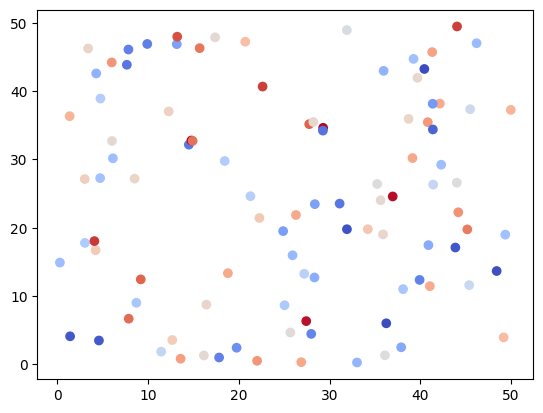

<ipython-input-10-8f237ca81c5a>:3: RuntimeWarning: invalid value encountered in subtract
  return alpha * (np.mean(pos, axis=0) - pos)
<ipython-input-10-8f237ca81c5a>:8: RuntimeWarning: invalid value encountered in subtract
  for other_pos in positions if np.linalg.norm(pos - other_pos) < 5], axis=0)
<ipython-input-10-8f237ca81c5a>:11: RuntimeWarning: invalid value encountered in subtract
  return gamma * (np.mean(vel, axis=0) - vel)


In [ ]:
# Simulation Loop
fig, ax = plt.subplots() # Create figure and axes outside the loop
for t in range(int(T_max / dt)):
    for i in range(N):
        F_coh = cohesion_force(positions[i])
        F_rep = repulsion_force(positions[i])
        F_align = alignment_force(velocities[i])

        # Compute total interaction force
        F_net = F_coh + F_rep + F_align

        # Compute entropy change
        dH_dt = np.gradient(entropy_values)[i]

        # Compute energy adaptation
        dE_dt = -0.05 * np.linalg.norm(velocities[i])**2

        # Update velocity using OAFA formulation
        velocities[i] += dt * (F_net - 0.1 * dH_dt - dE_dt)
        positions[i] += velocities[i] * dt

    # Plot results (Optional visualization)
    if t % 10 == 0:
        ax.clear() # Clear the previous plot
        ax.scatter(positions[:, 0], positions[:, 1], c=entropy_values, cmap='coolwarm')
        plt.pause(0.01) # Pause to allow for visualization

plt.show() # Show the final plot

START AFRESH WITH NEW CODE

In [ ]:
#✅ Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from collections import deque


In [ ]:
!pip install Pillow

In [ ]:
#✅ Step 2: Define OAFA Parameters
NUM_AGENTS = 50
DIM = 2
ALPHA = 1.0     # energy weight
BETA = 0.8      # entropy weight
GAMMA = 1.2     # collision penalty
LEARNING_RATE = 0.05
VISUAL_RADIUS = 10
MAX_SPEED = 2.0
TIME_STEPS = 500


In [ ]:
#✅ Step 3: Define Agent Class with Adaptive Rules
class Agent:
    def __init__(self, pos, vel):
        self.pos = np.array(pos)
        self.vel = np.array(vel)
        self.history = deque(maxlen=10)
        self.rule_weights = {
            'cohesion': 1.0,
            'separation': 1.0,
            'alignment': 1.0
        }

    def limit_speed(self):
        speed = np.linalg.norm(self.vel)
        if speed > MAX_SPEED:
            self.vel = self.vel / speed * MAX_SPEED

    def update(self, agents):
        neighbors = [a for a in agents if np.linalg.norm(a.pos - self.pos) < VISUAL_RADIUS and a != self]
        if not neighbors:
            self.pos += self.vel
            self.pos = np.mod(self.pos, [100, 100])  # <<< WRAPPING FIX
            return

        cohesion = np.mean([a.pos for a in neighbors], axis=0) - self.pos
        alignment = np.mean([a.vel for a in neighbors], axis=0) - self.vel
        separation = -np.sum([(a.pos - self.pos) / np.linalg.norm(a.pos - self.pos + 1e-6)**2 for a in neighbors], axis=0)

        self.vel += (
            self.rule_weights['cohesion'] * cohesion +
            self.rule_weights['separation'] * separation +
            self.rule_weights['alignment'] * alignment
        )

        self.limit_speed()
        self.pos += self.vel
        self.pos = np.mod(self.pos, [100, 100])  # <<< WRAPPING FIX
        self.history.append(self.vel.copy())


In [ ]:
#✅ Step 4: Define Thermodynamic Cost Components
def kinetic_energy(agents):
    return np.mean([np.linalg.norm(agent.vel)**2 for agent in agents])

def velocity_entropy(agents):
    velocities = np.array([agent.vel for agent in agents])
    normed = velocities / (np.linalg.norm(velocities, axis=1, keepdims=True) + 1e-6)
    bins, _ = np.histogramdd(normed, bins=10)
    probs = bins.flatten() / np.sum(bins)
    probs = probs[probs > 0]
    return -np.sum(probs * np.log(probs))

def collision_penalty(agents):
    penalty = 0.0
    for i, a in enumerate(agents):
        for j, b in enumerate(agents):
            if i != j and np.linalg.norm(a.pos - b.pos) < 1.0:
                penalty += 1.0
    return penalty / len(agents)


In [ ]:
#✅ Step 5: Adapt Rule Weights with Gradient Descent
def update_rule_weights(agent, agents):
    E = kinetic_energy(agents)
    S = velocity_entropy(agents)
    C = collision_penalty(agents)
    J = ALPHA * E + BETA * S + GAMMA * C

    # Dummy gradients – replace with true gradients if needed
    grad = {
        'cohesion': np.random.uniform(-1, 1),
        'separation': np.random.uniform(-1, 1),
        'alignment': np.random.uniform(-1, 1),
    }

    for key in agent.rule_weights:
        agent.rule_weights[key] -= LEARNING_RATE * grad[key]
        agent.rule_weights[key] = np.clip(agent.rule_weights[key], 0.1, 3.0)


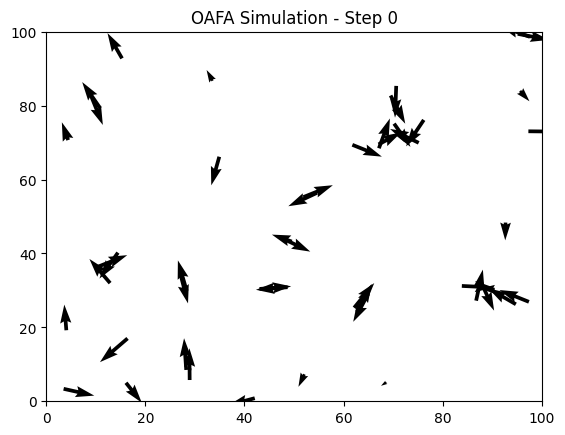

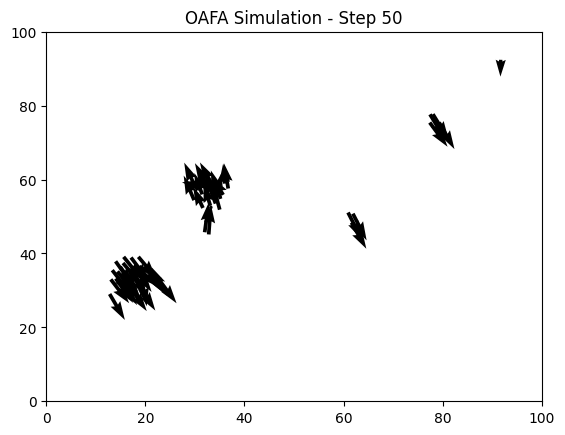

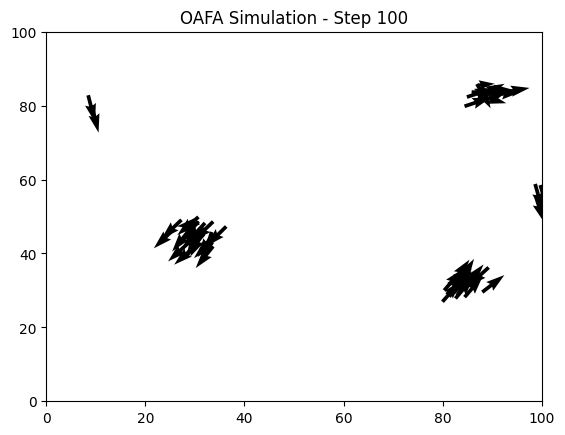

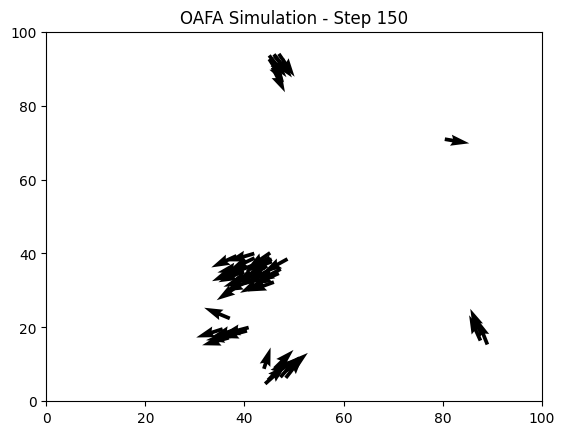

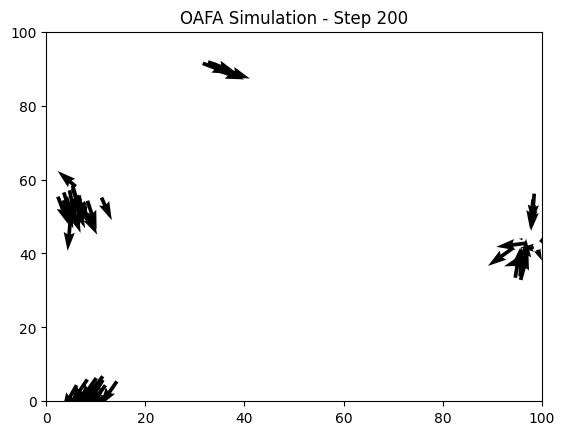

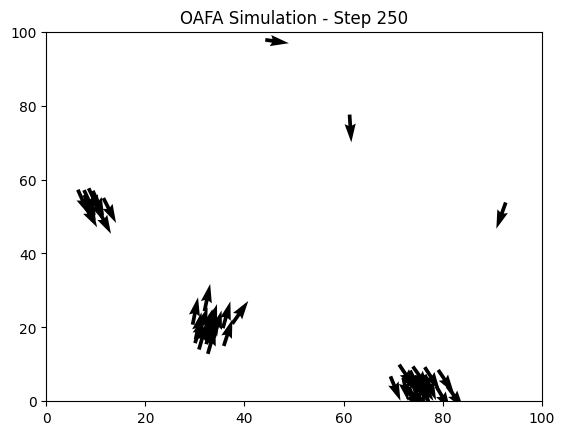

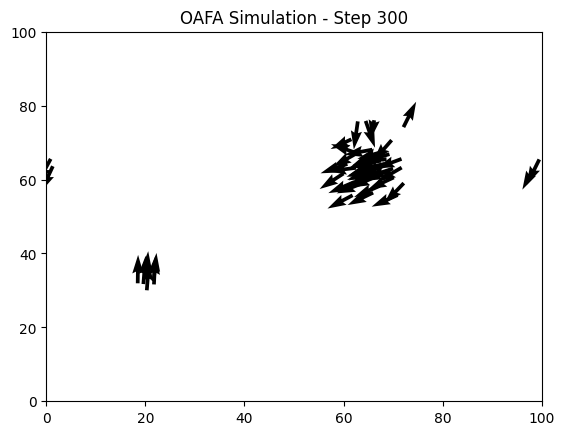

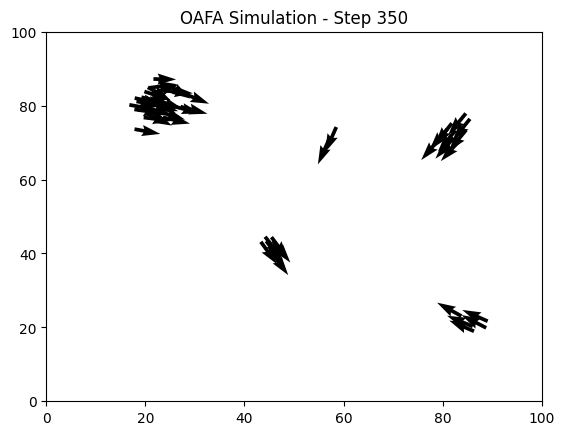

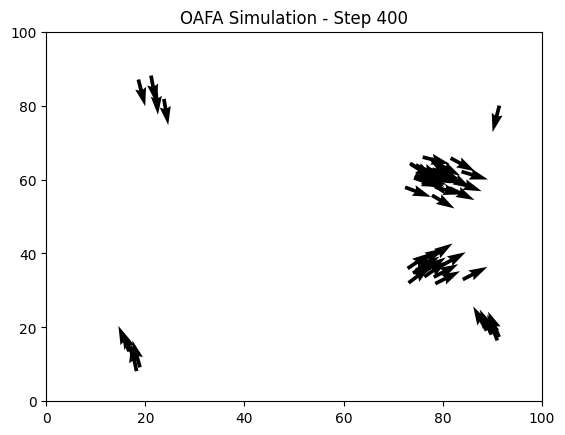

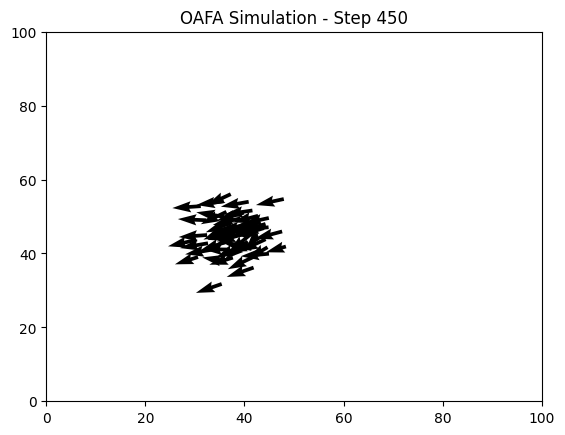

In [ ]:
agents = [Agent(np.random.rand(2) * 100, np.random.randn(2)) for _ in range(NUM_AGENTS)]

for t in range(TIME_STEPS):
    for agent in agents:
        agent.update(agents)
    for agent in agents:
        update_rule_weights(agent, agents)

    if t % 50 == 0:
        plt.clf()
        positions = np.array([a.pos for a in agents])
        velocities = np.array([a.vel for a in agents])
        plt.quiver(positions[:, 0], positions[:, 1], velocities[:, 0], velocities[:, 1])
        plt.title(f"OAFA Simulation - Step {t}")
        plt.xlim(0, 100)
        plt.ylim(0, 100)
        plt.pause(0.1)

    #if t >= 150:  # Stop at time step 150
        #break

plt.show()


'oafa_predator_simulation.gif'

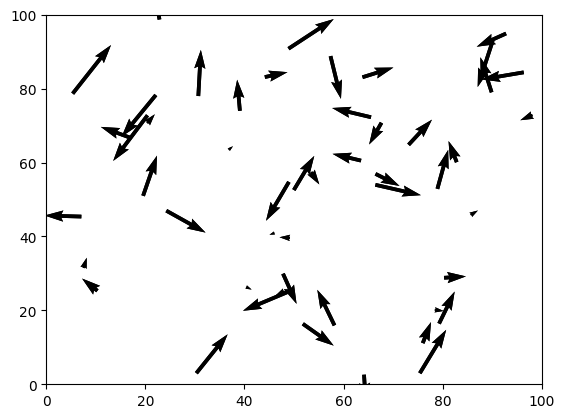

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import deque
from PIL import Image  # Import Pillow for image handling

# Parameters
NUM_AGENTS = 50
DIM = 2
ALPHA = 1.0
BETA = 0.8
GAMMA = 1.2
LEARNING_RATE = 0.05
VISUAL_RADIUS = 10
MAX_SPEED = 2.0
TIME_STEPS = 200
PREDATOR_SPEED = 3.0

# Agent class
class Agent:
    def __init__(self, pos, vel):
        self.pos = np.array(pos)
        self.vel = np.array(vel)
        self.history = deque(maxlen=10)
        self.rule_weights = {
            'cohesion': 1.0,
            'separation': 1.0,
            'alignment': 1.0
        }

    def limit_speed(self):
        speed = np.linalg.norm(self.vel)
        if speed > MAX_SPEED:
            self.vel = self.vel / speed * MAX_SPEED

    def update(self, agents, predator):
        neighbors = [a for a in agents if np.linalg.norm(a.pos - self.pos) < VISUAL_RADIUS and a != self]
        if not neighbors:
            self.pos += self.vel
            return

        cohesion = np.mean([a.pos for a in neighbors], axis=0) - self.pos
        alignment = np.mean([a.vel for a in neighbors], axis=0) - self.vel
        separation = -np.sum([(a.pos - self.pos) / np.linalg.norm(a.pos - self.pos + 1e-6)**2 for a in neighbors], axis=0)

        predator_vec = self.pos - predator
        predator_dist = np.linalg.norm(predator_vec)
        if predator_dist < 20:
            predator_avoidance = predator_vec / (predator_dist + 1e-6)**2
        else:
            predator_avoidance = np.zeros(2)

        self.vel += (
            self.rule_weights['cohesion'] * cohesion +
            self.rule_weights['separation'] * separation +
            self.rule_weights['alignment'] * alignment +
            5.0 * predator_avoidance
        )

        self.limit_speed()
        self.pos += self.vel
        self.history.append(self.vel.copy())

# Initialize agents
agents = [Agent(np.random.rand(2) * 100, np.random.randn(2)) for _ in range(NUM_AGENTS)]
predator = np.array([50.0, 50.0])
predator_direction = np.random.randn(2)
predator_direction = predator_direction / np.linalg.norm(predator_direction) * PREDATOR_SPEED

# Animation setup
fig, ax = plt.subplots()

def init():
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    # Initialize quiver with initial data within init()
    initial_positions = np.array([a.pos for a in agents])
    initial_velocities = np.array([a.vel for a in agents])
    scat = ax.quiver(initial_positions[:, 0], initial_positions[:, 1],
                     initial_velocities[:, 0], initial_velocities[:, 1], scale=20)
    pred_dot, = ax.plot([], [], 'ro', markersize=10)
    return scat, pred_dot

def update(frame):
    global predator
    for agent in agents:
        agent.update(agents, predator)
    for agent in agents:
        grad = {
            'cohesion': np.random.uniform(-1, 1),
            'separation': np.random.uniform(-1, 1),
            'alignment': np.random.uniform(-1, 1),
        }
        for key in agent.rule_weights:
            agent.rule_weights[key] -= LEARNING_RATE * grad[key]
            agent.rule_weights[key] = np.clip(agent.rule_weights[key], 0.1, 3.0)

    predator[:] += predator_direction
    if np.any(predator < 0) or np.any(predator > 100):
        predator[:] = np.clip(predator, 0, 100)
        predator_direction[:] = -predator_direction

    pos = np.array([a.pos for a in agents])
    vel = np.array([a.vel for a in agents])
    # Update quiver data within update()
    scat.set_offsets(pos)
    scat.set_UVC(vel[:, 0], vel[:, 1])
    pred_dot.set_data([predator[0]], [predator[1]])
    return scat, pred_dot

ani = animation.FuncAnimation(fig, update, frames=TIME_STEPS, init_func=init, blit=True, interval=100)
gif_path = "oafa_predator_simulation.gif"

# Create a list to store the frames
frames = []

# Generate animation frames manually
for i in range(TIME_STEPS):
    update(i)  # Call the update function to advance the animation
    fig.canvas.draw()  # Redraw the figure to update the frame

    # Get RGBA buffer and convert to RGB
    buffer = fig.canvas.renderer.buffer_rgba()
    image = np.frombuffer(buffer, dtype=np.uint8)
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (4,))  # RGBA has 4 channels
    image = Image.frombytes("RGBA", fig.canvas.get_width_height(), buffer)  # Create image from RGBA buffer
    image = image.convert("RGB")  # Convert to RGB

    frames.append(image)  # Append the converted image

# Save the frames as a GIF using Pillow
gif_path = "oafa_predator_simulation.gif"
frames[0].save(gif_path, format='GIF', append_images=frames[1:], loop=0, fps=10)

gif_path


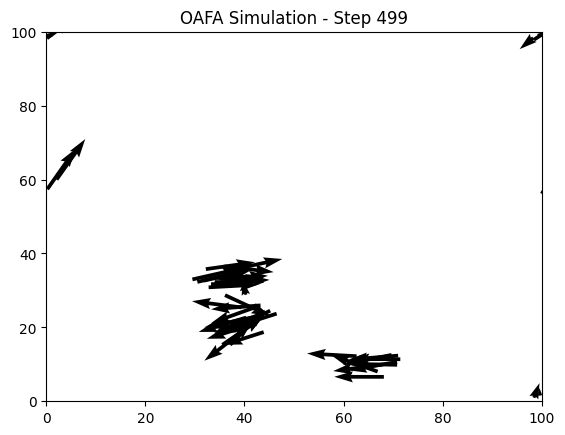

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import deque
from IPython.display import HTML
from base64 import b64encode
#!pip install Pillow

# Parameters
NUM_AGENTS = 50
TIME_STEPS = 500
VISUAL_RADIUS = 10
MAX_SPEED = 2.0
LEARNING_RATE = 0.05

# Agent class
class Agent:
    def __init__(self, pos, vel):
        self.pos = np.array(pos)
        self.vel = np.array(vel)
        self.history = deque(maxlen=10)
        self.rule_weights = {
            'cohesion': 1.0,
            'separation': 1.0,
            'alignment': 1.0
        }

    def limit_speed(self):
        speed = np.linalg.norm(self.vel)
        if speed > MAX_SPEED:
            self.vel = self.vel / speed * MAX_SPEED

    def update(self, agents):
        neighbors = [a for a in agents if np.linalg.norm(a.pos - self.pos) < VISUAL_RADIUS and a != self]
        if not neighbors:
            self.pos += self.vel
            self.pos = np.mod(self.pos, [100, 100])
            return

        cohesion = np.mean([a.pos for a in neighbors], axis=0) - self.pos
        alignment = np.mean([a.vel for a in neighbors], axis=0) - self.vel
        separation = -np.sum([(a.pos - self.pos) / (np.linalg.norm(a.pos - self.pos) + 1e-6)**2 for a in neighbors], axis=0)

        self.vel += (
            self.rule_weights['cohesion'] * cohesion +
            self.rule_weights['separation'] * separation +
            self.rule_weights['alignment'] * alignment
        )

        self.limit_speed()
        self.pos += self.vel
        self.pos = np.mod(self.pos, [100, 100])
        self.history.append(self.vel.copy())

def update_rule_weights(agent, agents):
    grad = {
        'cohesion': np.random.uniform(-1, 1),
        'separation': np.random.uniform(-1, 1),
        'alignment': np.random.uniform(-1, 1),
    }
    for key in agent.rule_weights:
        agent.rule_weights[key] -= LEARNING_RATE * grad[key]
        agent.rule_weights[key] = np.clip(agent.rule_weights[key], 0.1, 3.0)

# Initialize agents
agents = [Agent(np.random.rand(2) * 100, np.random.randn(2)) for _ in range(NUM_AGENTS)]

# Setup figure
fig, ax = plt.subplots()
initial_positions = np.array([a.pos for a in agents])
initial_velocities = np.array([a.vel for a in agents])
quiver = ax.quiver(initial_positions[:, 0], initial_positions[:, 1],
                   initial_velocities[:, 0], initial_velocities[:, 1], scale=20)
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

def init():
    return quiver,

def animate(t):
    for agent in agents:
        agent.update(agents)
    for agent in agents:
        update_rule_weights(agent, agents)

    pos = np.array([a.pos for a in agents])
    vel = np.array([a.vel for a in agents])
    quiver.set_offsets(pos)
    quiver.set_UVC(vel[:, 0], vel[:, 1])
    ax.set_title(f"OAFA Simulation - Step {t}")
    return quiver,

# Create animation
ani = animation.FuncAnimation(fig, animate, frames=TIME_STEPS, init_func=init, blit=True)

# Save MP4
ani.save("oafa_wrapped_simulation.mp4", writer="ffmpeg", fps=10)  # Use 'ffmpeg' as the writer

# Embed the MP4 video in the notebook
mp4 = open('oafa_wrapped_simulation.mp4', 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

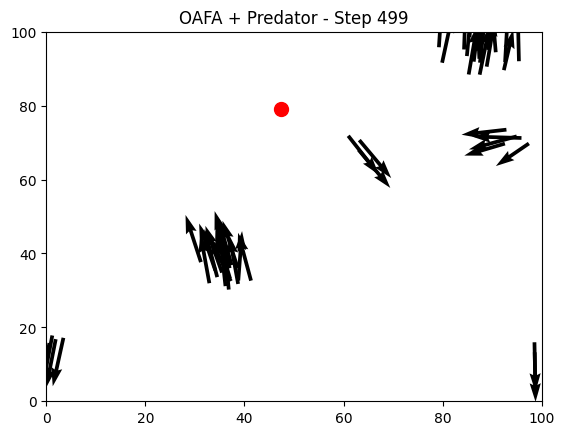

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import deque
from IPython.display import HTML
from base64 import b64encode

# Parameters
NUM_AGENTS = 50
TIME_STEPS = 500
VISUAL_RADIUS = 10
MAX_SPEED = 2.0
LEARNING_RATE = 0.05
PREDATOR_SPEED = 3.0

# Agent class with predator avoidance
class Agent:
    def __init__(self, pos, vel):
        self.pos = np.array(pos)
        self.vel = np.array(vel)
        self.history = deque(maxlen=10)
        self.rule_weights = {
            'cohesion': 1.0,
            'separation': 1.0,
            'alignment': 1.0
        }

    def limit_speed(self):
        speed = np.linalg.norm(self.vel)
        if speed > MAX_SPEED:
            self.vel = self.vel / speed * MAX_SPEED

    def update(self, agents, predator):
        neighbors = [a for a in agents if np.linalg.norm(a.pos - self.pos) < VISUAL_RADIUS and a != self]
        if not neighbors:
            self.pos += self.vel
            self.pos = np.mod(self.pos, [100, 100])
            return

        cohesion = np.mean([a.pos for a in neighbors], axis=0) - self.pos
        alignment = np.mean([a.vel for a in neighbors], axis=0) - self.vel
        separation = -np.sum([(a.pos - self.pos) / (np.linalg.norm(a.pos - self.pos) + 1e-6)**2 for a in neighbors], axis=0)

        predator_vec = self.pos - predator
        predator_dist = np.linalg.norm(predator_vec)
        predator_avoidance = predator_vec / (predator_dist + 1e-6)**2 if predator_dist < 20 else np.zeros(2)

        self.vel += (
            self.rule_weights['cohesion'] * cohesion +
            self.rule_weights['separation'] * separation +
            self.rule_weights['alignment'] * alignment +
            5.0 * predator_avoidance
        )

        self.limit_speed()
        self.pos += self.vel
        self.pos = np.mod(self.pos, [100, 100])
        self.history.append(self.vel.copy())

def update_rule_weights(agent, agents):
    grad = {
        'cohesion': np.random.uniform(-1, 1),
        'separation': np.random.uniform(-1, 1),
        'alignment': np.random.uniform(-1, 1),
    }
    for key in agent.rule_weights:
        agent.rule_weights[key] -= LEARNING_RATE * grad[key]
        agent.rule_weights[key] = np.clip(agent.rule_weights[key], 0.1, 3.0)

# Initialize agents and predator
agents = [Agent(np.random.rand(2) * 100, np.random.randn(2)) for _ in range(NUM_AGENTS)]
predator = np.array([50.0, 50.0])
predator_direction = np.random.randn(2)
predator_direction = predator_direction / np.linalg.norm(predator_direction) * PREDATOR_SPEED

# Setup plot
fig, ax = plt.subplots()
initial_positions = np.array([a.pos for a in agents])
initial_velocities = np.array([a.vel for a in agents])
quiver = ax.quiver(initial_positions[:, 0], initial_positions[:, 1],
                   initial_velocities[:, 0], initial_velocities[:, 1], scale=20)
pred_dot, = ax.plot([], [], 'ro', markersize=10)
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

def init():
    return quiver, pred_dot

def animate(t):
    global predator, predator_direction

    for agent in agents:
        agent.update(agents, predator)
    for agent in agents:
        update_rule_weights(agent, agents)

    predator += predator_direction
    if np.any(predator < 0) or np.any(predator > 100):
        predator = np.clip(predator, 0, 100)
        predator_direction *= -1

    pos = np.array([a.pos for a in agents])
    vel = np.array([a.vel for a in agents])
    quiver.set_offsets(pos)
    quiver.set_UVC(vel[:, 0], vel[:, 1])
    pred_dot.set_data([predator[0]], [predator[1]])
    ax.set_title(f"OAFA + Predator - Step {t}")
    return quiver, pred_dot

# Create animation
ani = animation.FuncAnimation(fig, animate, frames=TIME_STEPS, init_func=init, blit=True)

# Save MP4
ani.save("oafa_predator_wrapped.mp4", writer="ffmpeg", fps=10)

# Embed the MP4 video in the notebook
mp4 = open('oafa_predator_wrapped.mp4', 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""
<video width=500 controls>
  <source src="{data_url}" type="video/mp4">
</video>
""")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# Create a folder in the root directory of your Google Drive
!mkdir -p "/content/drive/My Drive/My Colab Files"

In [ ]:
# Re-run the OAFA experimental analysis code after environment reset

import numpy as np
import matplotlib.pyplot as plt

# Parameters
NUM_AGENTS = 50
VISUAL_RADIUS = 10
MAX_SPEED = 2.0
PREDATOR_SPEED = 3.0
TIME_STEPS = 300

# Metrics
flocking_efficiency = []
entropy_series = []
collision_penalty = []

# Agent class
class Agent:
    def __init__(self, pos, vel):
        self.pos = np.array(pos)
        self.vel = np.array(vel)
        self.rule_weights = {
            'cohesion': 1.0,
            'separation': 1.0,
            'alignment': 1.0
        }

    def limit_speed(self):
        speed = np.linalg.norm(self.vel)
        if speed > MAX_SPEED:
            self.vel = self.vel / speed * MAX_SPEED

    def update(self, agents, predator):
        neighbors = [a for a in agents if np.linalg.norm(a.pos - self.pos) < VISUAL_RADIUS and a != self]
        if not neighbors:
            self.pos += self.vel
            self.pos = np.mod(self.pos, [100, 100])
            return

        cohesion = np.mean([a.pos for a in neighbors], axis=0) - self.pos
        alignment = np.mean([a.vel for a in neighbors], axis=0) - self.vel
        separation = -np.sum([(a.pos - self.pos) / (np.linalg.norm(a.pos - self.pos) + 1e-6)**2 for a in neighbors], axis=0)

        predator_vec = self.pos - predator
        predator_dist = np.linalg.norm(predator_vec)
        predator_avoidance = predator_vec / (predator_dist + 1e-6)**2 if predator_dist < 20 else np.zeros(2)

        self.vel += (
            self.rule_weights['cohesion'] * cohesion +
            self.rule_weights['separation'] * separation +
            self.rule_weights['alignment'] * alignment +
            5.0 * predator_avoidance
        )

        self.limit_speed()
        self.pos += self.vel
        self.pos = np.mod(self.pos, [100, 100])

# Initialize agents and predator
agents = [Agent(np.random.rand(2) * 100, np.random.randn(2)) for _ in range(NUM_AGENTS)]
predator = np.array([50.0, 50.0])
predator_direction = np.random.randn(2)
predator_direction = predator_direction / np.linalg.norm(predator_direction) * PREDATOR_SPEED

# Run simulation
for _ in range(TIME_STEPS):
    for agent in agents:
        agent.update(agents, predator)
    predator += predator_direction
    if np.any(predator < 0) or np.any(predator > 100):
        predator = np.clip(predator, 0, 100)
        predator_direction *= -1

    velocities = np.array([a.vel for a in agents])
    speeds = np.linalg.norm(velocities, axis=1)
    avg_speed = np.mean(speeds)
    norm_vels = velocities / (speeds[:, np.newaxis] + 1e-6)
    mean_dir = np.linalg.norm(np.mean(norm_vels, axis=0))
    flocking_efficiency.append(mean_dir)

    hist, _ = np.histogram(norm_vels[:, 0], bins=10, range=(-1, 1), density=True)
    probs = hist[hist > 0]
    entropy = -np.sum(probs * np.log(probs + 1e-6))
    entropy_series.append(entropy)

    collisions = 0
    for i in range(NUM_AGENTS):
        for j in range(i + 1, NUM_AGENTS):
            if np.linalg.norm(agents[i].pos - agents[j].pos) < 1.0:
                collisions += 1
    collision_penalty.append(collisions)

# Plot results
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(flocking_efficiency)
plt.title("Flocking Efficiency")
plt.xlabel("Time")
plt.ylabel("Alignment (mean direction)")

plt.subplot(1, 3, 2)
plt.plot(entropy_series)
plt.title("Entropy Suppression")
plt.xlabel("Time")
plt.ylabel("Directional Entropy")

plt.subplot(1, 3, 3)
plt.plot(collision_penalty)
plt.title("Collision Penalty")
plt.xlabel("Time")
plt.ylabel("Number of Close Pairs")

plt.tight_layout()
analysis_plot_path = "/content/drive/My Drive/My Colab Files/OAFA_Experimental_Analysis.png" # Changed the save path
plt.savefig(analysis_plot_path)
plt.close()

analysis_plot_path

'/content/drive/My Drive/My Colab Files/OAFA_Experimental_Analysis.png'

OAFA with Multiple Predators

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import deque

# Parameters
NUM_AGENTS = 100
NUM_PREDATORS = 3
TIME_STEPS = 500
VISUAL_RADIUS = 10
MAX_SPEED = 2.0
LEARNING_RATE = 0.05
PREDATOR_SPEED = 3.0

# Storage
all_positions = []
all_velocities = []

# Agent class
class Agent:
    def __init__(self, pos, vel):
        self.pos = np.array(pos)
        self.vel = np.array(vel)
        self.history = deque(maxlen=10)
        self.rule_weights = {
            'cohesion': 1.0,
            'separation': 1.0,
            'alignment': 1.0
        }

    def limit_speed(self):
        speed = np.linalg.norm(self.vel)
        if speed > MAX_SPEED:
            self.vel = self.vel / speed * MAX_SPEED

    def update(self, agents, predators):
        neighbors = [a for a in agents if np.linalg.norm(a.pos - self.pos) < VISUAL_RADIUS and a != self]
        if not neighbors:
            self.pos += self.vel
            self.pos = np.mod(self.pos, [100, 100])
            return

        cohesion = np.mean([a.pos for a in neighbors], axis=0) - self.pos
        alignment = np.mean([a.vel for a in neighbors], axis=0) - self.vel
        separation = -np.sum([(a.pos - self.pos) / (np.linalg.norm(a.pos - self.pos) + 1e-6)**2 for a in neighbors], axis=0)

        # Multiple predator avoidance
        predator_avoidance = np.zeros(2)
        for pred in predators:
            vec = self.pos - pred
            dist = np.linalg.norm(vec)
            if dist < 20:
                predator_avoidance += vec / (dist + 1e-6)**2

        self.vel += (
            self.rule_weights['cohesion'] * cohesion +
            self.rule_weights['separation'] * separation +
            self.rule_weights['alignment'] * alignment +
            5.0 * predator_avoidance
        )

        self.limit_speed()
        self.pos += self.vel
        self.pos = np.mod(self.pos, [100, 100])
        self.history.append(self.vel.copy())

def update_rule_weights(agent, agents):
    grad = {
        'cohesion': np.random.uniform(-1, 1),
        'separation': np.random.uniform(-1, 1),
        'alignment': np.random.uniform(-1, 1),
    }
    for key in agent.rule_weights:
        agent.rule_weights[key] -= LEARNING_RATE * grad[key]
        agent.rule_weights[key] = np.clip(agent.rule_weights[key], 0.1, 3.0)



In [ ]:
!apt-get update && apt-get install ffmpeg

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,776 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,986 kB]
Get:13 http://archive.ubuntu.com/ubuntu ja

Saved: oafa_3predators.gif


FileNotFoundError: [Errno 2] No such file or directory: 'oafa_3predators.gif'

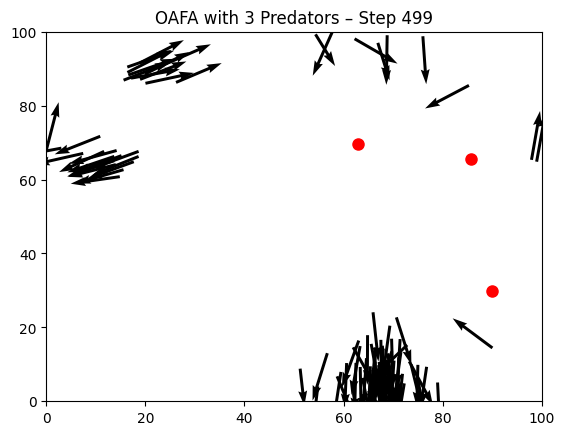

In [ ]:
# Initialize agents and predators
agents = [Agent(np.random.rand(2) * 100, np.random.randn(2)) for _ in range(NUM_AGENTS)]
predators = [np.random.rand(2) * 100 for _ in range(NUM_PREDATORS)]
predator_dirs = [np.random.randn(2) for _ in range(NUM_PREDATORS)]
predator_dirs = [d / np.linalg.norm(d) * PREDATOR_SPEED for d in predator_dirs]

# Plot setup
fig, ax = plt.subplots()
initial_positions = np.array([a.pos for a in agents])
initial_velocities = np.array([a.vel for a in agents])
quiver = ax.quiver(initial_positions[:, 0], initial_positions[:, 1],
                   initial_velocities[:, 0], initial_velocities[:, 1], scale=20)
pred_dots = [ax.plot([], [], 'ro', markersize=8)[0] for _ in range(NUM_PREDATORS)]
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

def init():
    return [quiver] + pred_dots

def animate(t):
    global predators, predator_dirs

    for agent in agents:
        agent.update(agents, predators)
    for agent in agents:
        update_rule_weights(agent, agents)

    # Update predator positions
    for i in range(NUM_PREDATORS):
        predators[i] += predator_dirs[i]
        if np.any(predators[i] < 0) or np.any(predators[i] > 100):
            predators[i] = np.clip(predators[i], 0, 100)
            predator_dirs[i] *= -1

    pos = np.array([a.pos for a in agents])
    vel = np.array([a.vel for a in agents])
    quiver.set_offsets(pos)
    quiver.set_UVC(vel[:, 0], vel[:, 1])

    for i, dot in enumerate(pred_dots):
        dot.set_data([predators[i][0]], [predators[i][1]])

    ax.set_title(f"OAFA with 3 Predators – Step {t}")

    # Save data
    all_positions.append(pos.copy())
    all_velocities.append(vel.copy())

    return [quiver] + pred_dots



# Animate and save
ani = animation.FuncAnimation(fig, animate, frames=TIME_STEPS, init_func=init, blit=True)

# Save animation as GIF
gif_path = "/content/drive/My Drive/My Colab Files/oafa_3predators.gif"
ani.save(gif_path, writer="pillow", fps=10)
print(f"Saved: {gif_path}")

# Display the GIF
from IPython.display import Image
Image(filename=gif_path)

# Save simulation data
np.save("positions_oafa_3pred.npy", np.array(all_positions))
np.save("velocities_oafa_3pred.npy", np.array(all_velocities))
print("Saved: positions_oafa_3pred.npy, velocities_oafa_3pred.npy")

In [ ]:
# ... your existing animation code (setup, Agent class, etc.) ...
from IPython.display import HTML
from base64 import b64encode

# Animate and save
ani = animation.FuncAnimation(fig, animate, frames=TIME_STEPS, init_func=init, blit=True, interval=100) # Added interval

ani.save("oafa_3predators.mp4", writer="ffmpeg", fps=10)
print("Saved: oafa_3predators.mp4")

# Display the MP4 video in the notebook
mp4 = open('oafa_3predators.mp4', 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""
<video width=500 controls>
  <source src="{data_url}" type="video/mp4">
</video>
""")

# ... the rest of your code (saving simulation data) ...

Saved: oafa_3predators.mp4
